### 1.请详细考察上述梯度下降法中的任意1-2种，并利用它们寻找某二元、三元或多元函数(建 议自行构造)的极小值点，比较并记录你的运算结果

#### 梯度下降法&Momentum 
Momentum方法相对于最初的梯度下降法的最大区别就是用一个参数$\gamma$记录下了上一次的梯度带来的影响

In [10]:
import numpy as np
def f(x,y):
    return np.power(x-1,2) + np.power(y-2,4) + 4
def fx(x,y):
    return 2*(x-1)
def fy(x,y):
    return 4*np.power(y-2,3)

In [11]:
def GD(func, x0, y0):
    h = 0.05
    x,y = x0,y0
    for _ in range(1000):
        x -= h * fx(x,y)
        y -= h * fy(x,y)
    f = func(x,y)
    return x,y,f

def Momentum(func, x0, y0, gamma):
    eta = 0.05
    x,y = x0,y0
    vx = eta * fx(x,y)
    vy = eta * fy(x,y)
    for _ in range(1000):
        vx = gamma*vx + eta*fx(x,y)
        vy = gamma*vy + eta*fy(x,y)
        x -= vx
        y -= vy    
    f = func(x,y)
    return x,y,f
    
    

In [15]:
gdRESULT = GD(f,0.5,0.5)
print("GD预测结果为x={:.2f},y={:.2f},f={:.3f}".format(gdRESULT[0],gdRESULT[1],gdRESULT[2]))
momRESULT = Momentum(f,0.5,0.5,0.9)
print("Momentum预测结果为x={:.2f},y={:.2f},f={:.3f}".format(momRESULT[0],momRESULT[1],momRESULT[2]))


GD预测结果为x=1.00,y=1.95,f=4.000
Momentum预测结果为x=1.00,y=2.02,f=4.000


### 2.选用合适的梯度下降方案，用于计算文件ex1.dat (三列数据分别为欧氏空间的x,y,z坐标)中 所给散点数据的线性(z=a+bx+cy)最小二乘拟合。

In [22]:
# 选择批梯度下降法

X = []
Y = []
Z = []
dim = 0
a,b,c = 1,1,1

with open("./ex1.dat") as file:
    for line in file:
        x,y,z = line.split(",")
        X.append(float(x))
        Y.append(float(y))
        Z.append(float(z))
    dim = len(X)


In [48]:
def g(x,y,a,b,c):
    return a + b * x + c * y

# 损失函数
def E(X,Y,Z,a,b,c):
    S = 0
    for i in range(dim):
        S += (Z[i] - g(X[i],Y[i],a,b,c)) ** 2
    return S/dim
# 偏导数
def Ea(X,Y,Z,a,b,c):
    S = 0
    for i in range(dim):
        S += 2 * (g(X[i],Y[i],a,b,c) - Z[i])
    return S/dim
def Eb(X,Y,Z,a,b,c):
    S = 0
    for i in range(dim):
        S += 2 * b * (g(X[i],Y[i],a,b,c) - Z[i])
    return S/dim
def Ec(X,Y,Z,a,b,c):
    S = 0
    for i in range(dim):
        S += 2 * c * (g(X[i],Y[i],a,b,c) - Z[i])
    return S/dim

def BGD():
    a,b,c = 1,1,1
    alpha = 0.001
    e = [E(X,Y,Z,a,b,c)]
    
    for _ in range(1000):
        a -= alpha * Ea(X,Y,Z,a,b,c)
        b -= alpha * Eb(X,Y,Z,a,b,c)
        c -= alpha * Ec(X,Y,Z,a,b,c)
        e.append(E(X,Y,Z,a,b,c))
    return a,b,c,e[-1]

        
        

In [49]:
a,b,c,e = BGD()
print("拟合结果:  a = {:.3f},b = {:.3f}, c = {:.3f}, 方差 var = {:.3f}".format(a,b,c,e))

拟合结果:  a = 0.967,b = 0.968, c = 0.968, 方差 var = 0.024


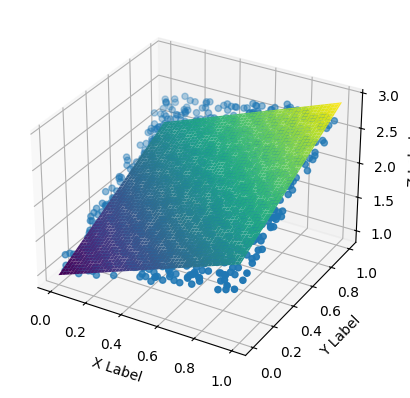

In [50]:
import matplotlib.pyplot as plt  

x = np.linspace(0, 1, 100)  
y = np.linspace(0, 1, 100)  
x, y = np.meshgrid(x, y)  
z = g(x, y, a, b, c)  
  
fig = plt.figure()  
ax = fig.add_subplot(111, projection='3d')  # 使用一个子图  

# 绘制曲面  
ax.plot_surface(x, y, z, cmap='viridis')  
  
# 绘制散点图  
x, y, z = np.array(X), np.array(Y), np.array(Z)  
ax.scatter(x, y, z)  
ax.set_xlabel('X Label')  
ax.set_ylabel('Y Label')  
ax.set_zlabel('Z Label')  
  
plt.show()  